# **Setup**

**Inicialization**

Run the following blocks for basic inicialization!

In [1]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     |████████████████████████████████| 276kB 15.5MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44076 sha256=778cd4ce34abfca7424e5c850c80f726d66e42eeeb44f2f24c6b1c1ad09ae037
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
1.7.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.8MB 612kB/s 
     |████████████████████████████████| 2.2MB 14.1MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20201211-cp36-none-any.whl size=40342 sha256=627b46f6cea87766e2189319873903d3514e56ff5cc59fb2758c2a3b13b01b1c
  Stored in directory: /root/.cache/pip/wheels/5b/3c/bf/cd07bac860e6d5df60eb17c756319c1bdd174dda32363b1cf8
  Created wheel for iopath: filename=iopath-0.1.2-cp36-none-any.whl size=10505 sha256=f20b90428f02dea22baad8dc7c5e1a8abb9c30b5ba92b1abf5a2f6047e52687d
  Stored in directory: /root/.cache/pip/wheels/9e/01/e4/1b68f5a2a6b9450ea4246d91840a77e1169f7d4722d76bbc47
Successfully built fvcore iopath
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.

In [3]:
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

     |████████████████████████████████| 5.7MB 13.0MB/s 
     |████████████████████████████████| 112kB 54.5MB/s 
  Created wheel for olefile: filename=olefile-0.46-py2.py3-none-any.whl size=35416 sha256=c947a1fdc7e0d63f07805509124a90fa05f806ca8d50b6cb30a14ccd8f3d8b04
  Stored in directory: /root/.cache/pip/wheels/4b/f4/11/bc4166107c27f07fd7bba707ffcb439619197638a1ac986df3
Successfully built olefile
ERROR: scikit-image 0.16.2 has requirement pillow>=4.3.0, but you'll have pillow 4.1.1 which is incompatible.
ERROR: detectron2 0.3+cu101 has requirement Pillow>=7.1, but you'll have pillow 4.1.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 8.0.1
    Uninstalling Pillow-8.0.1:
      Successfully uninstalled Pillow-8.0.1


# **Methods**

After running the first few blocks you have to restart the runtime!

After restarting the environment only run the blocks under the Methods text


In [1]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from tqdm import tqdm
import re,os
from scipy.spatial import distance

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



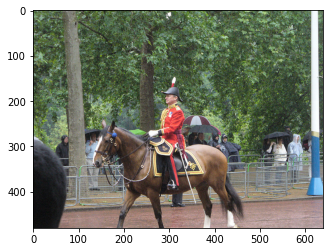

In [2]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('input.jpg')
imgplot = plt.imshow(img)
#im = cv2.imread("./input.jpg")
#cv2_imshow(im)

In [3]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(img)

model_final_f10217.pkl: 178MB [00:08, 21.2MB/s]                           
/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


In [4]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([17,  0,  0,  0,  0, 25, 25,  0,  0, 25,  0,  0, 17], device='cuda:0')
Boxes(tensor([[124.6309, 246.0555, 464.5736, 480.0000],
        [250.5950, 157.1207, 339.5732, 408.2415],
        [ 49.3506, 274.3738,  80.1652, 342.3896],
        [  0.0000, 284.6656,  78.5014, 478.5184],
        [386.0469, 270.9830, 411.8350, 303.1007],
        [334.2236, 251.3125, 414.0236, 277.6147],
        [331.4684, 231.2236, 393.7103, 257.4648],
        [561.0319, 271.5630, 594.9162, 390.1004],
        [512.4014, 276.6873, 563.4663, 389.4302],
        [329.3685, 230.3824, 402.1460, 278.3009],
        [526.8883, 277.4476, 561.6942, 344.5837],
        [114.9138, 268.0710, 145.6501, 397.1750],
        [113.1456, 267.1171, 159.3613, 395.6359]], device='cuda:0'))


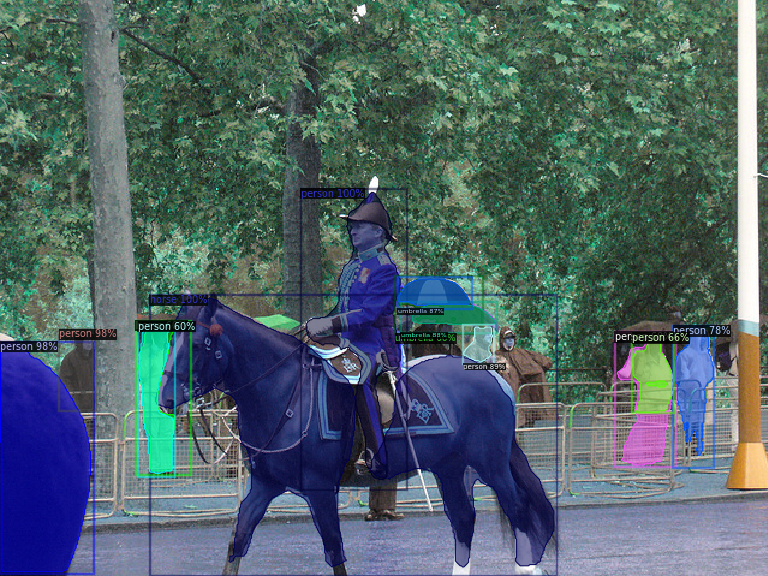

In [5]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [6]:
# downloading video from google drive

!mkdir frames/
!gdown --id 16mvxi2_OaEFLhGh_BiEbDZusYl1Mhx_O

Downloading...
From: https://drive.google.com/uc?id=16mvxi2_OaEFLhGh_BiEbDZusYl1Mhx_O
To: /content/halfmin.mp4
15.0MB [00:00, 47.6MB/s]


# **Training the model**

In [7]:
!rm -rf ThisNoAll-DL-HomeWork
!mkdir output

In [8]:
!git clone https://github.com/Abokyy/ThisNoAll-DL-HomeWork

Cloning into 'ThisNoAll-DL-HomeWork'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 4200 (delta 4), reused 11 (delta 3), pack-reused 4186
Receiving objects: 100% (4200/4200), 344.06 MiB | 44.41 MiB/s, done.
Resolving deltas: 100% (1308/1308), done.
Checking out files: 100% (4128/4128), done.


In [18]:
import os
import torch
import torch.utils.data
import torchvision
from PIL import Image
from pycocotools.coco import COCO
import random
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

In [10]:
register_coco_instances("pedestrian_dataset_train", {}, "ThisNoAll-DL-HomeWork/train_dataset/coco/train/_annotations.coco.json", "ThisNoAll-DL-HomeWork/train_dataset/coco/train")
register_coco_instances("pedestrian_dataset_validate", {}, "ThisNoAll-DL-HomeWork/train_dataset/coco/valid/_annotations.coco.json", "ThisNoAll-DL-HomeWork/train_dataset/coco/valid")
register_coco_instances("pedestrian_dataset_test", {}, "ThisNoAll-DL-HomeWork/train_dataset/coco/test/_annotations.coco.json", "ThisNoAll-DL-HomeWork/train_dataset/coco/test")

WARNING [12/11 20:21:26 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/11 20:21:26 d2.data.datasets.coco]: Loaded 929 images in COCO format from ThisNoAll-DL-HomeWork/train_dataset/coco/train/_annotations.coco.json


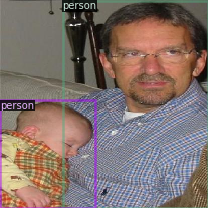

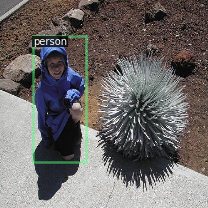

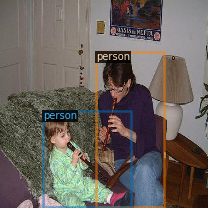

In [11]:
#visualize training data
my_dataset_train_metadata = MetadataCatalog.get("pedestrian_dataset_train")
dataset_dicts = DatasetCatalog.get("pedestrian_dataset_train")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [12]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("pedestrian_dataset_train",)
cfg.DATASETS.TEST = ("pedestrian_dataset_validate",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 1500 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4

In [13]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

os.makedirs("coco_eval", exist_ok=True)
output_folder = "coco_eval"

In [14]:
CocoTrainer = DefaultTrainer(cfg)
os.makedirs(cfg.OUTPUT_DIR,exist_ok=True)
CocoTrainer.resume_or_load(resume=False)
CocoTrainer.train()

[12/11 20:21:28 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_68b088.pkl: 421MB [00:19, 21.8MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (5, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (5,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (16, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (16,) in the model! You might want to double check if this is expected.


[12/11 20:21:53 d2.engine.train_loop]: Starting training from iteration 0
[12/11 20:22:30 d2.utils.events]:  eta: 0:46:07  iter: 19  total_loss: 2.575  loss_cls: 1.655  loss_box_reg: 0.9269  loss_rpn_cls: 0.006869  loss_rpn_loc: 0.006206  time: 1.8500  data_time: 0.0266  lr: 1.9981e-05  max_mem: 7414M
[12/11 20:23:08 d2.utils.events]:  eta: 0:45:59  iter: 39  total_loss: 2.29  loss_cls: 1.388  loss_box_reg: 0.8776  loss_rpn_cls: 0.01236  loss_rpn_loc: 0.009469  time: 1.8914  data_time: 0.0127  lr: 3.9961e-05  max_mem: 7414M
[12/11 20:23:48 d2.utils.events]:  eta: 0:45:33  iter: 59  total_loss: 1.877  loss_cls: 0.9678  loss_box_reg: 0.899  loss_rpn_cls: 0.01371  loss_rpn_loc: 0.01534  time: 1.9149  data_time: 0.0108  lr: 5.9941e-05  max_mem: 7414M
[12/11 20:24:29 d2.utils.events]:  eta: 0:46:34  iter: 79  total_loss: 1.562  loss_cls: 0.6547  loss_box_reg: 0.8781  loss_rpn_cls: 0.008875  loss_rpn_loc: 0.007058  time: 1.9512  data_time: 0.0125  lr: 7.9921e-05  max_mem: 7414M
[12/11 20:25:

In [21]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("pedestrian_dataset_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "pedestrian_dataset_test")
inference_on_dataset(CocoTrainer.model, val_loader, evaluator)

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (5, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (5,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (16, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (16,) in the model! You might want to double check if this is expected.


WARNING [12/11 21:25:42 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass tasks in directly
WARNING [12/11 21:25:42 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/11 21:25:42 d2.data.datasets.coco]: Loaded 133 images in COCO format from ThisNoAll-DL-HomeWork/train_dataset/coco/test/_annotations.coco.json
[12/11 21:25:42 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[12/11 21:25:42 d2.data.common]: Serializing 133 elements to byte tensors and concatenating them all ...
[12/11 21:25:42 d2.data.common]: Serialized dataset takes 0.04 MiB
[12/11 21:25:42 d2.evaluation.evaluator]: Start inference on 133 images
[12/11 21:25:44 d2.evaluation.evaluator]: Inference done 11/133. 0.1811 s / img. ETA=0:00:22
[12/11 21:25:50 d2.evaluation.evaluator]: 

OrderedDict([('bbox',
              {'AP': 68.44870789123601,
               'AP-pedestrians': nan,
               'AP-person': 65.84368256981826,
               'AP-person-like': 71.05373321265373,
               'AP50': 92.71158346161481,
               'AP75': 75.7836974245176,
               'APl': 71.62445413638137,
               'APm': 49.288946062927145,
               'APs': 47.6063375568326})])

In [22]:
from detectron2.utils.visualizer import ColorMode
import glob

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("pedestrian_dataset_test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("pedestrian_dataset_test")

for imageName in glob.glob('/content/test/*jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata, 
                scale=0.8
                 )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])

# **Generating video**

In these block we are gona generate video 

In [23]:
# Converting video file to pictures

capture = cv2.VideoCapture('halfmin.mp4')
counter = 0
FPS = capture.get(cv2.CAP_PROP_FPS)
print(FPS)
try:
  while capture.isOpened():
    ret,frame = capture.read()
    if ret == True:
      cv2.imwrite('frames/{}.png'.format(str(counter)),frame)
      counter += 1
      # the main video is 0,5 min length with 60fps so gona be cutted down to 15 secs
      if counter == (30*FPS):
        break
    else:
      break
except:
  print("Can't open video file!")

60.0


In [24]:
# Visualization method to draw out the image

def visualize(image):
  v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
  v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(v.get_image()[:, :, ::-1])

In [25]:
# class of the pedestrians we gona store them in an array
Pedestrians = []

class pedestrian():
  # the 2 points of the rectangle
  def __init__(self,x1,y1,x2,y2,idx):
    self.x1 = x1
    self.x2 = x2
    self.y1 = y1
    self.y2 = y2
    self.risky = []
    self.idx = idx
    self.less_risky = []
    self.inRisk = False
    self.zone = 'blue'

  def __eq__(self,other):
    if not isinstance(other,pedestrian):
      return NotImplemented
    return not ((not (self.x1 == other.x1) or not (
                self.y1 == other.y1)) or not (
                self.x2 == other.x2) or not (
                self.y2 == other.y2))

  # all the risky people around a pedestrian
  def add_risky(self,people):
    self.risky.append(people)

  # adding all the less risky (yellow color) pedestrians
  def add_less_risky(self,people):
    self.less_risky.append(people)

  # returning the midle point of the pedestrian in integer
  def get_mid_points(self):
    return int((self.x1+self.x2)/2),int(self.y2)
  
  def get_distance(self,other):
    return distance.euclidean(self.get_mid_points(),other.get_mid_points())

  # these is for the setter of risky situtaion
  def in_risk(self,_val):
    self.inRisk = _val

  def set_zone(self,_val):
    self.zone = str(_val)

In [26]:
def change_color(img,Pedestrian,color):
  # we deffined 2 cases, yellow if the other pedestrian is near but not too near, red if the other pedestrian is to near
  _col = None
  if str(color) == 'red':
    _col = (255,0,0)
  elif str(color) == 'yellow':
    _col = (255,255,0)
  elif str(color) == 'blue':
    _col = (0,0,255)
  else:
    _col = (0,0,255)

  cv2.rectangle(img,(Pedestrian.x1,Pedestrian.y1),(Pedestrian.x2,Pedestrian.y2),_col,2)
  return img

In [27]:
def draw_line(img,Ped1,Ped2,color):
  # drawing line to the boxes
  _col = None
  if str(color) == 'red':
    _col = (255,0,0)
  elif str(color) == 'yellow':
    _col = (255,255,0)

  cv2.line(img,Ped1.get_mid_points(),Ped2.get_mid_points(),_col,2)
  return img

In [28]:
def compute_dist(pedestrians,thresh1,thresh2):
  for ped1 in pedestrians:
    for ped2 in pedestrians:
      if ped1 != ped2:
        if thresh1 < ped1.get_distance(ped2) <= thresh2:
          ped1.add_less_risky(ped2)
          ped2.add_less_risky(ped1)
          ped1.in_risk(True)
          ped2.in_risk(True)
        elif ped1.get_distance(ped2) <= thresh1:
          ped1.add_risky(ped2)
          ped2.add_risky(ped1)
          ped1.in_risk(True)
          ped2.in_risk(True)

In [29]:
def draw_colors_on_img(img,pedestrians):
  for _pred in pedestrians:
    if _pred.inRisk == False:
      if _pred.zone != 'red' and _pred.zone != 'yellow':
        img = change_color(img,_pred,'blue')

    for _p in _pred.less_risky:
      if _p.zone != 'red':
        img = change_color(img,_p,'yellow')
        _p.set_zone('yellow')

      for _p2 in _p.less_risky:
        img = draw_line(img,_p,_p2,'yellow')

    for _p in _pred.risky:
      img = change_color(img,_p,'red')
      _p.set_zone('red')
      for _p2 in _p.risky:
        img = draw_line(img,_p,_p2,'red')
  return img

In [30]:
def find_closest_pedestrians(name,thresh1,thresh2):
  Pedestrians[:]=[]
  img = cv2.imread('frames/{}'.format(str(name)))
  outputs = predictor(img)
  classes = outputs['instances'].pred_classes.cpu().numpy()
  bbox = outputs['instances'].pred_boxes.tensor.cpu().numpy()
  person = bbox[np.where(classes==0)[0]]
  
  # uploading Pedestrians array with the values
  for _person,idx in zip(person,np.arange(0,len(person),step=1)):
    x1,y1,x2,y2 = _person
    Pedestrians.append(pedestrian(x1,y1,x2,y2,idx))
  
  # computing distances and adding the risky values
  compute_dist(Pedestrians,thresh1,thresh2)
  img = draw_colors_on_img(img,Pedestrians)
  cv2.imwrite('frames/{}'.format(str(name)),img)


# **Generating output**

In [31]:
# thresh1 is the red warning
thresh1=60
# thresh2 is the yellow warning
thresh2=95
names=os.listdir('frames/')
names.sort(key=lambda f: int(re.sub('\D', '', f)))
# TQDM for progress bar
[find_closest_pedestrians(names[i],thresh1,thresh2) for i in tqdm(range(len(names))) ]

100%|██████████| 1800/1800 [14:18<00:00,  2.10it/s]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [32]:
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))
frame_array=[]

for i in range(len(frames)):
  #reading each files 
  img = cv2.imread('frames/'+frames[i])
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  height, width, layers = img.shape
  size = (width,height)
  #inserting the frames into an image array
  frame_array.append(img)

out = cv2.VideoWriter('sample_output.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 25, size)

for i in range(len(frame_array)):
  # writing to a image array
  out.write(frame_array[i])
out.release()

RuntimeError: ignored